In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
from scripts.ellipse import CosmoFisher
from scripts.plot_contour import plot_ellipse
rc('text', usetex=True)
rc('font', family='serif')
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

In [ ]:
# make a class with everything and inputs are things they can change

## Steps:

### 1. Update parameter values

In [2]:
# dictionary of cosmological parameters (add or remove rows as needed)
cosmo_params = {
        'Om': {'value': 0.26, 'label': '$\Omega_m$'},
        's8': {'value': 0.84, 'label': '$\sigma_8$'},
        'w0': {'value': -1, 'label': '$w_0$'},
        'ns': {'value': 0.9649, 'label': '$n_s$'},
        'Ob': {'value': 0.0493, 'label': '$\Omega_b$'},
        'H0': {'value': 67.3, 'label': '$H_0$'},
        'S8': {'value': 0.78, 'label': '$S_8$'}
        }

### 2. Add Fisher Matrices 

In [3]:
# sample N x N Fisher matrices for N parameters for each configuration/method (replace with your own)

fisher_matrix_1 = [[ 2.60199397e+06,  1.42666474e+06, -1.44585170e+05,
                    6.32351038e+03, -2.08336870e+05, -1.85261601e+02,
                    -1.04695707e+04, -6.93834446e+02],
                    [ 1.42666474e+06,  8.59542852e+05, -7.83891826e+04,
                    -1.75528414e+04, -7.80875696e+04, -2.36318807e+02,
                    -6.73452175e+03, -4.73772136e+02],
                    [-1.44585170e+05, -7.83891826e+04,  1.22828458e+04,
                    7.16013805e+02, -1.02017597e+03,  1.58844824e+01,
                    3.01460452e+02,  2.78656489e+01],
                    [ 6.32351038e+03, -1.75528414e+04,  7.16013805e+02,
                    9.78908918e+03, -2.84555963e+04,  6.37752962e+01,
                    1.81921347e+02,  2.24617838e+01],
                    [-2.08336870e+05, -7.80875696e+04, -1.02017597e+03,
                    -2.84555963e+04,  1.94273956e+05, -1.84774369e+02,
                    1.88813948e+03,  6.52494184e+01],
                    [-1.85261601e+02, -2.36318807e+02,  1.58844824e+01,
                    6.37752962e+01, -1.84774369e+02,  4.51909195e-01,
                    2.04382303e+00,  1.98014980e-01],
                    [-1.04695707e+04, -6.73452175e+03,  3.01460452e+02,
                    1.81921347e+02,  1.88813948e+03,  2.04382303e+00,
                    9.18065714e+01,  5.56267757e+00],
                    [-6.93834446e+02, -4.73772136e+02,  2.78656489e+01,
                    2.24617838e+01,  6.52494184e+01,  1.98014980e-01,
                    5.56267757e+00,  4.29922750e-01]]

fisher_matrix_2 = [[ 4.30096136e+05,  2.58321823e+05, -2.96309063e+04,
                    -2.40364236e+04,  4.60168300e+04, -1.98713551e+02,
                    -1.15743939e+03, -1.17389795e+02],
                    [ 2.58321823e+05,  1.59669663e+05, -1.80258434e+04,
                    -1.53744637e+04,  2.93173689e+04, -1.25315013e+02,
                    -7.21856772e+02, -1.30496782e+02],
                    [-2.96309063e+04, -1.80258434e+04,  2.25156051e+03,
                    1.83767433e+03, -3.81364297e+03,  1.44686953e+01,
                    7.18537288e+01,  2.92744828e+01],
                    [-2.40364236e+04, -1.53744637e+04,  1.83767433e+03,
                    2.42126748e+03, -4.40789235e+03,  1.47805910e+01,
                    6.68322814e+01,  3.32466880e+01],
                    [ 4.60168300e+04,  2.93173689e+04, -3.81364297e+03,
                    -4.40789235e+03,  3.30734193e+05,  2.16624206e-01,
                    1.29854173e+02,  2.31947049e+02],
                    [-1.98713551e+02, -1.25315013e+02,  1.44686953e+01,
                    1.47805910e+01,  2.16624206e-01,  1.85835040e-01,
                    4.46674944e-01,  2.34966329e-01],
                    [-1.15743939e+03, -7.21856772e+02,  7.18537288e+01,
                    6.68322814e+01,  1.29854173e+02,  4.46674944e-01,
                    2.85106006e+01, -4.82297919e-02],
                    [-1.17389795e+02, -1.30496782e+02,  2.92744828e+01,
                    3.32466880e+01,  2.31947049e+02,  2.34966329e-01,
                    -4.82297918e-02,  2.20406683e+01]]

# move matrices into a file
# maybe make script to load any type of data


# update values and labels and add rows as needed
fisher_dict = {
    'f1': {'value': fisher_matrix_1, 'label': 'Method 1'},
    'f2': {'value': fisher_matrix_2, 'label': 'Method 2'}
}

fisher_matrices = list(fisher_dict.keys())

### 3. Customise contour colours

In [4]:
recon_colors = [
    [0.0, 0.302, 0.698],  # Medium Blue
    [0.282, 0.82, 0.8],  # Teal
    [1.0, 0.647, 0],  # Orange
    [0.118, 0.565, 1.0],  # Blue
    [1.0, 0.41, 0.71],  # Pink
    [0.4, 0.8, 0.2],  # Green
    [0.729, 0.333, 0.827], # Purple
    ]

### 4. Plot contours for a given pair of cosmological parameters

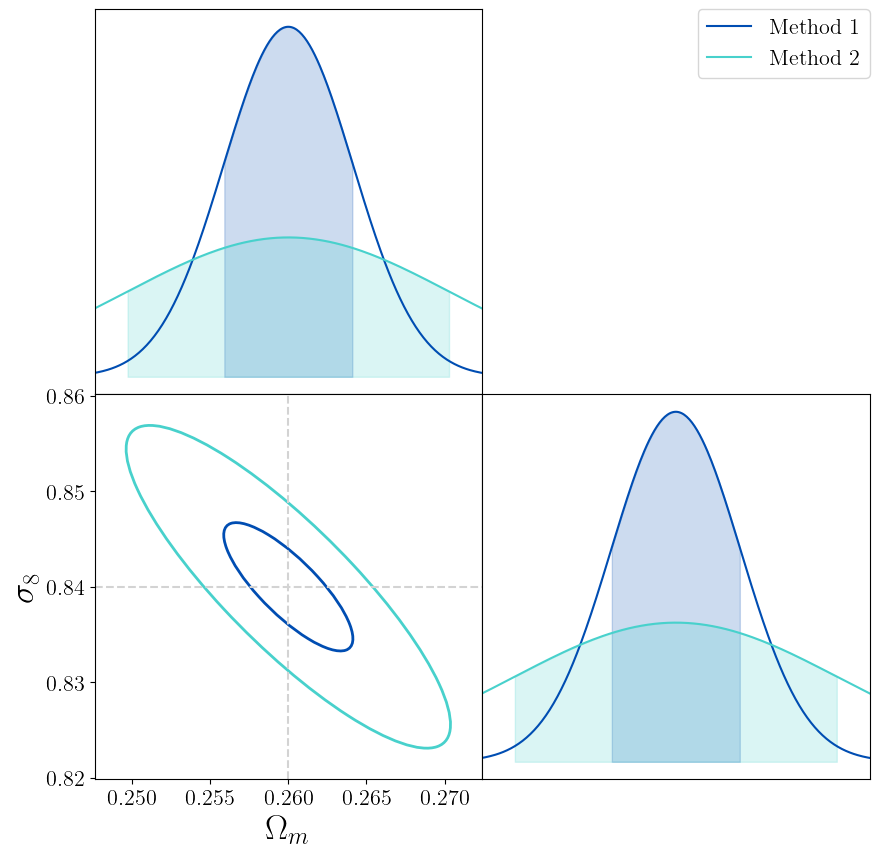

In [5]:
# update parameters as needed
p1 = 'Om'
p2 = 's8'

# make this a function in plot_contour.py
for index, f in enumerate(fisher_matrices):
    fisher_matrix = fisher_dict[f]['value']
    if index==0:
        axs = plot_ellipse(p1, p2, fisher_matrix, cosmo_params, color=recon_colors[index], label=fisher_dict[f]['label'])
    else:
        plot_ellipse(p1, p2, fisher_matrix, cosmo_params, axs=axs, color=recon_colors[index], label=fisher_dict[f]['label'])

### Optional:  Plot $\Omega_m$-$S_8$ contours for a given pair of cosmological parameters

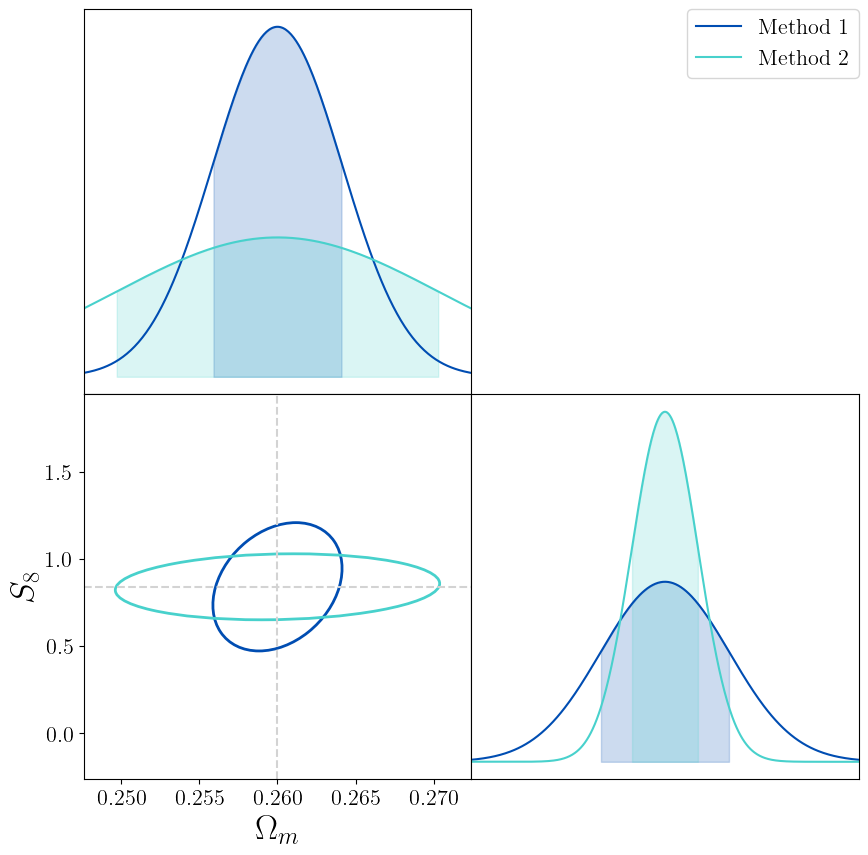

In [6]:
# update parameters as needed
p1 = 'Om'
p2 = 'S8'

# make this a function in plot_contour.py
for index, f in enumerate(fisher_matrices):
    fisher_matrix = fisher_dict[f]['value']
    if index==0:
        axs = plot_ellipse(p1, p2, fisher_matrix, cosmo_params, color=recon_colors[index], label=fisher_dict[f]['label'])
    else:
        plot_ellipse(p1, p2, fisher_matrix, cosmo_params, axs=axs, color=recon_colors[index], label=fisher_dict[f]['label'])